# Numerical Integration and Differentiation

## 1. Rectangular and Trapezoidal Methods


<div style="display: flex;">
<div style="padding-right: 10px">
    <img src="slices.png" width=500>
</div>
<div style="padding:20px 0;">
    <b>Formula for the Trapezoidal Method:</b><br>
    <img src="trapezoid_formula.png" width=650><br>
    <b>Approximation Error:</b> <br>
    <img src="trapezoid_error.png" width=250>
</div>
</div>


### Example 1
<div style="display: flex;">
<div>
    <img src="circle.png" width=400><br>
</div>
<div>
  <div>
    <img src="limit.png" width=180>
  </div>
  <div>
    <img src="x_y.png" width=400>
  </div>
</div>
</div>

In [3]:
import math, time

# Globals
eps = 1e-8
N = 100000
a = -1
b = 0
h = (b-a)/N

# True integral
#Area_true = 1.57079632679
Area_true = 0.5*math.pi/2
Area = 0
Area_tr = 0

# function
def f(x):
  return math.sqrt(1 - x * x)

# start time
st = time.time()

# Rectangular Method
def int_rect(a, b, N):
  S = 0
  h = (b-a)/N
  for i in range(0, N):
    x_h = a + i*h
    y_h = f(x_h)
    S += y_h
  return h * S

Area = int_rect(a, b, N)

# Trapezoidal Method
def int_trap(a, b, N):
  h = (b-a)/N  
  S = 0.5 * (f(a) + f(b))
  for i in range(1, N):
    S += f(a + i*h)  
  return h * S

Area_tr = int_trap(a, b, N)

# end time
en = time.time()

print("Run time:\t", en-st)

err = abs(Area_true - Area_tr)
print("True area:\t", Area_true)
err = abs(Area_true - Area)
print("Approx. rect.:\t", Area, "\tError:", err)
err = abs(Area_true - Area_tr)
print("Approx. trap.:\t", Area_tr, "\tError:", err)
print("Step h:\t\t", h)


Run time:	 0.040930986404418945
True area:	 0.7853981633974483
Approx. rect.:	 0.7853931541004984 	Error: 5.00929694990937e-06
Approx. trap.:	 0.7853981541004984 	Error: 9.29694987661378e-09
Step h:		 1e-05


## 2. Simson's Rule

<div style="display: flex;">
<div>
    <img src="simson.png" width=350>
</div>
<div style="padding:50px 0;">
    <b>Formula for the Simson's rule:</b><br>
    <img src="simson_formula.png" width=650><br>
    <b>Approximation Error:</b> <br>
    <img src="simson_error.png" width=250>
</div>
    
</div>

### Example 2

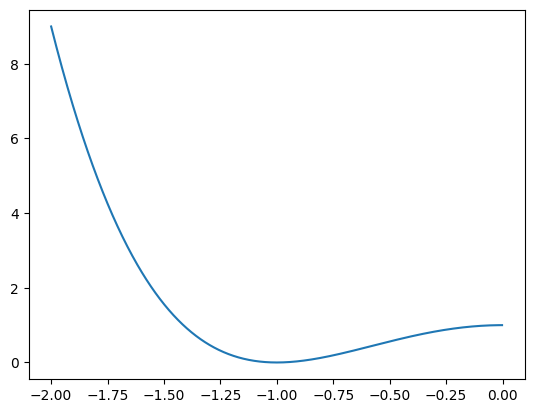

In [2]:
import math, time
import matplotlib.pyplot as plt
import numpy as np

# Globals
a = -2
b = 0
N = 1000
h = (b-a)/N  

# Plot the function y = x^4 - 2x^3 + 1
x = np.asarray([a + i*h for i in range(N)])
y = np.power(x,4) - 2*np.power(x,2) + 1

plt.plot(x,y)
plt.show()


In [1]:
import math, time

# Globals
a = -1
b = 1
N = 100
h = (b-a)/N  

# True integral
I_b = math.pow(b,5)/5 - 2*math.pow(b,3)/3 + b
I_a = math.pow(a,5)/5 - 2*math.pow(a,3)/3 + a
Area_true = I_b - I_a

# function
def f(x):
    return math.pow(x,4) - 2*math.pow(x,2) + 1
    
# start time
st = time.time()

# Trapezoidal Method
def int_trap(a, b, N):
  h = (b-a)/N  
  f_a = f(a)
  f_b = f(b)
  S = 0.5 * (f_a + f_b)
  for i in range(1, N):
    x_h = a + i*h
    y_h = f(x_h)
    S += y_h
  return h * S

Area_tr = int_trap(a, b, N)

# Simson's Method
def int_simson(a, b, N):
  h = (b-a)/N  
  f_a = f(a)
  f_b = f(b)
  S = f_a + f_b

  # odd indices
  S1 = 0  
  for i in range(1, N, 2):
    x_h = a + i*h
    y_h = f(x_h)
    S1 += y_h
    
  # even indices
  S2 = 0  
  for i in range(2, N, 2):
    x_h = a + i*h
    y_h = f(x_h)
    S2 += y_h
      
  return h * (S + 4*S1 + 2*S2) / 3

Area_sim = int_simson(a, b, N)
   
# end time
en = time.time()

print("Run time:\t", en-st)
print("True area:\t", Area_true)
err = abs(Area_true - Area_tr)
err_est = abs(4*math.pow(a,3) - 4*a - 4*math.pow(b,3) + 4*b)*math.pow(h,2)/12
print("Approx. trap.:\t", Area_tr, "\tError:", err, "\tError (est):", err_est)
err = abs(Area_true - Area_sim)
err_est = abs(24*a - 24*b)*math.pow(h,4)/90
print("Approx. sims.:\t", Area_sim, "\tError:", err, "\tError (est):", err_est)
print("N:", N, h)

Run time:	 0.0004057884216308594
True area:	 1.0666666666666669
Approx. trap.:	 1.0666666559999993 	Error: 1.0666667549230624e-08 	Error (est): 0.0
Approx. sims.:	 1.0666667093333335 	Error: 4.266666664420882e-08 	Error (est): 8.533333333333334e-08
N: 100 0.02


## 3. Iterative integration and Error estimation

<hr>

### 3.1. Trapezoidal Medod 

<div style="display: flex;">

<div>
    <b>Iterative integration (for step size $N_i$):</b><br>
    <img src="trapezoid_interactive.png" width=350><br>
    <b>Error estimation:</b> <br>
    <img src="trapezoid_estimate.png" width=200>
</div>
    
</div>

<hr>

### 3.2. Simson's Method

<div style="display: flex;">

<div>
    <b>Iterative integration (for step size $N_i$):</b><br>
    <img src="simson_1.png" width=400><br>
    <img src="simson_2.png" width=200><br>
    <img src="simson_3.png" width=150><br>
    <img src="simson_4.png" width=150><br>
    <b>Error estimation:</b> <br>
    <img src="simson_estimate.png" width=150>
</div>
    
</div>

In [2]:
import math, time

# Globals
a = -1
b = 0
N = 10
h = (b-a)/N  
eps = 1e-8
err = 1

# True integral
I_b = math.pow(b,5)/5 - 2*math.pow(b,3)/3 + b
I_a = math.pow(a,5)/5 - 2*math.pow(a,3)/3 + a
Area_true = I_b - I_a
Area_true = 0.5*math.pi/2

# function
def f(x):
    #return math.pow(x,4) - 2*math.pow(x,2) + 1
    return math.sqrt(1 - x * x)

# Trapezoidal Method
def integrate(a, b, N):
  h = (b-a)/N  
  f_a = f(a)
  f_b = f(b)
  S = 0.5 * (f_a + f_b)
  for i in range(1, N):
    x_h = a + i*h
    y_h = f(x_h)
    S += y_h
  return h * S

# start time
st = time.time()

Int_cur = integrate(a, b, N)

while abs(err) > eps:
    Int_prev = Int_cur
    
    # set ne step size
    N = 2 * N
    h = (b-a)/N 
    
    # compute for odd indices
    S = 0  
    for i in range(1, N, 2):
      x_h = a + i*h
      y_h = f(x_h)
      S += y_h

    # update new integral
    Int_cur = 0.5*Int_prev + h*S  
    
    # estimate error
    err = (Int_cur - Int_prev)/3

Area_tr = Int_cur

# end time
en = time.time()

print("Run time:\t", en-st)
print("True area:\t", Area_true)
err = abs(Area_true - Area_tr)
err_est = abs(4*math.pow(a,3) - 4*a - 4*math.pow(b,3) + 4*b)*math.pow(h,2)/12
print("Approx. trap.:\t", Area_tr, "\tError:", err, "\tError (est):", err_est)
print("N =", N)
print("h =", (b-a)/N)

Run time:	 0.026401042938232422
True area:	 0.7853981633974483
Approx. trap.:	 0.7853981508586632 	Error: 1.2538785121307683e-08 	Error (est): 0.0
N = 81920
h = 1.220703125e-05
